In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [ ]:
df.shape

(214, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

# Data Visualization

## Histogram for all the columns

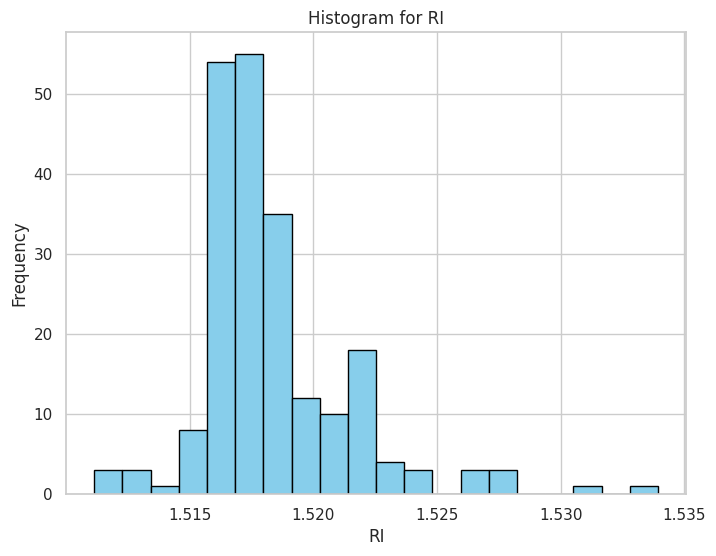

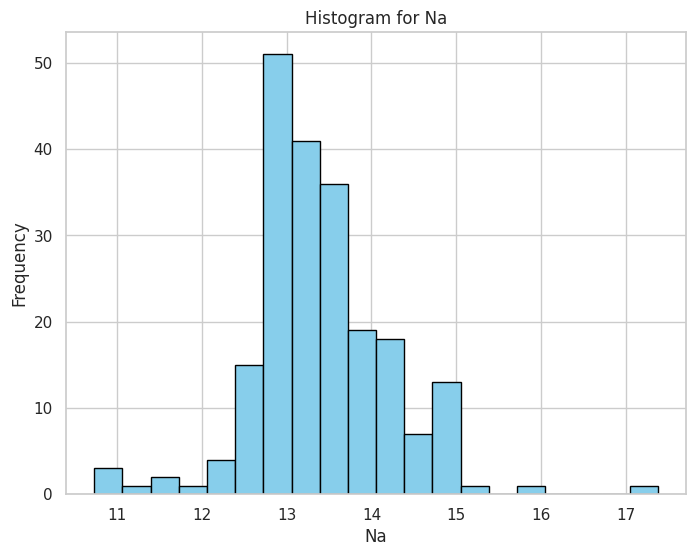

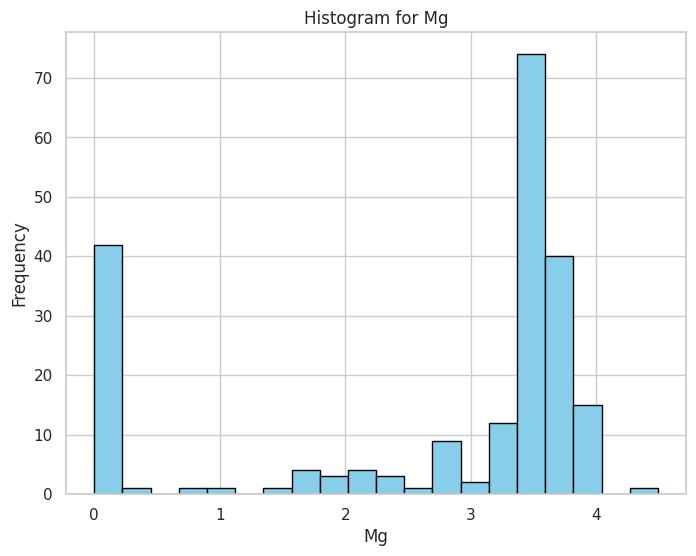

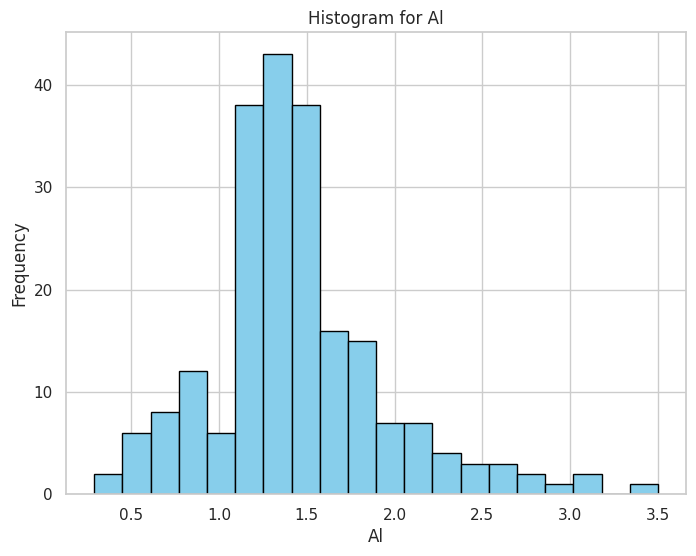

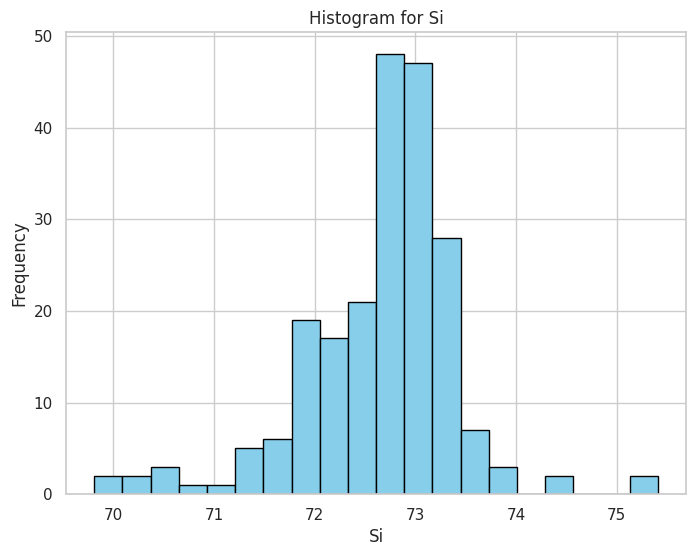

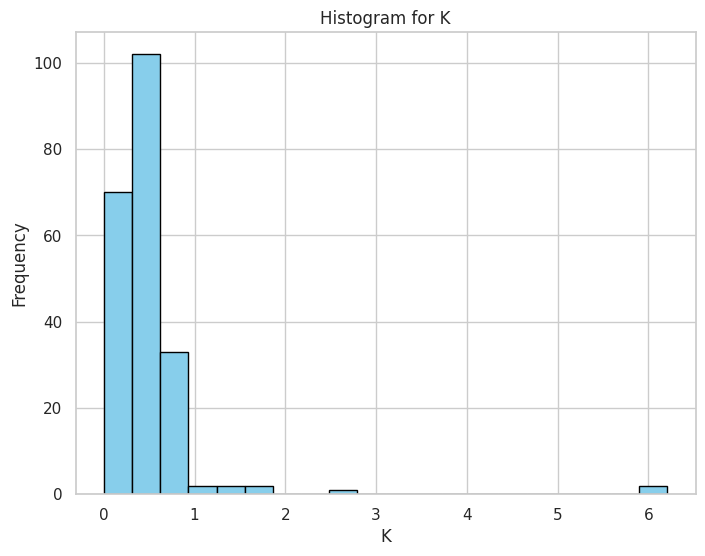

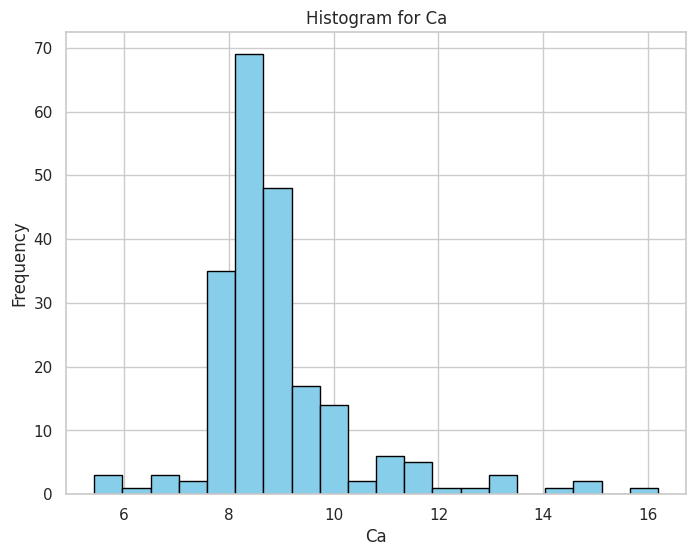

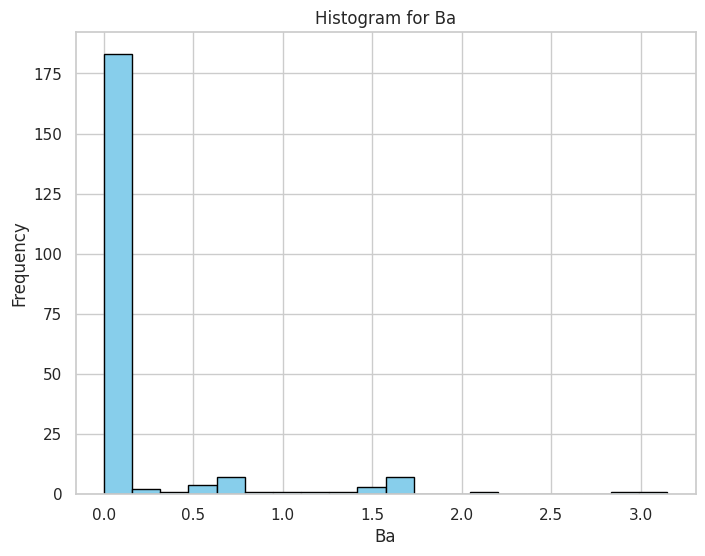

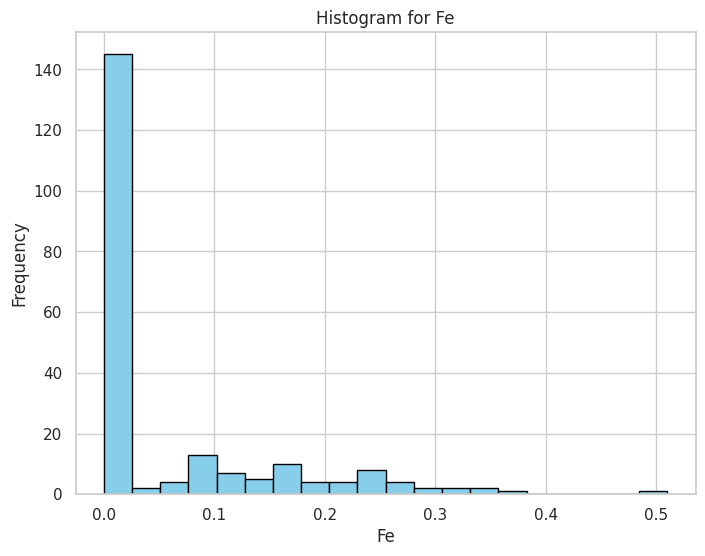

In [ ]:
# Constructing Histogram
for column in df.columns[0:-1]:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Distplot for all the columns

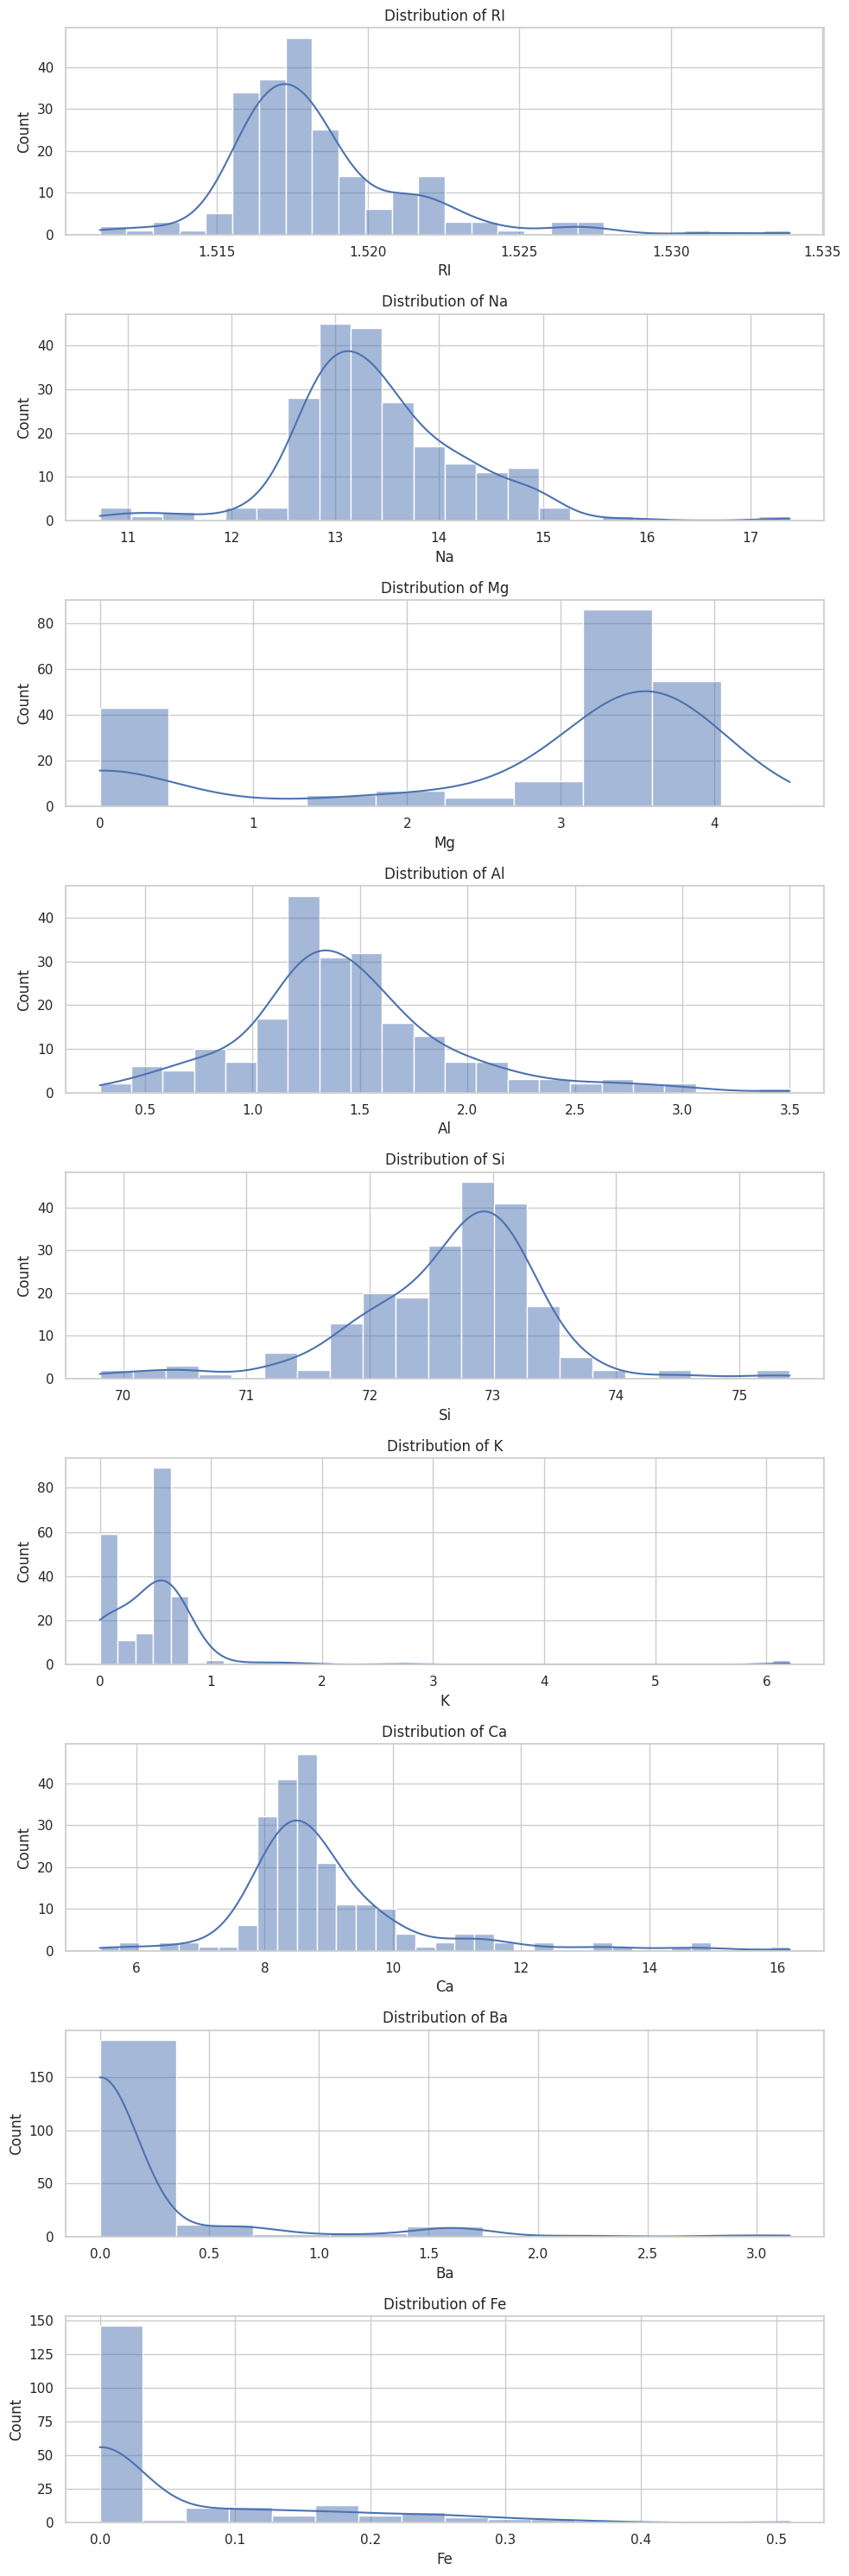

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(df.columns[:-1]), ncols=1, figsize=(10, 30))

# Iterate through each column and create a distplot
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

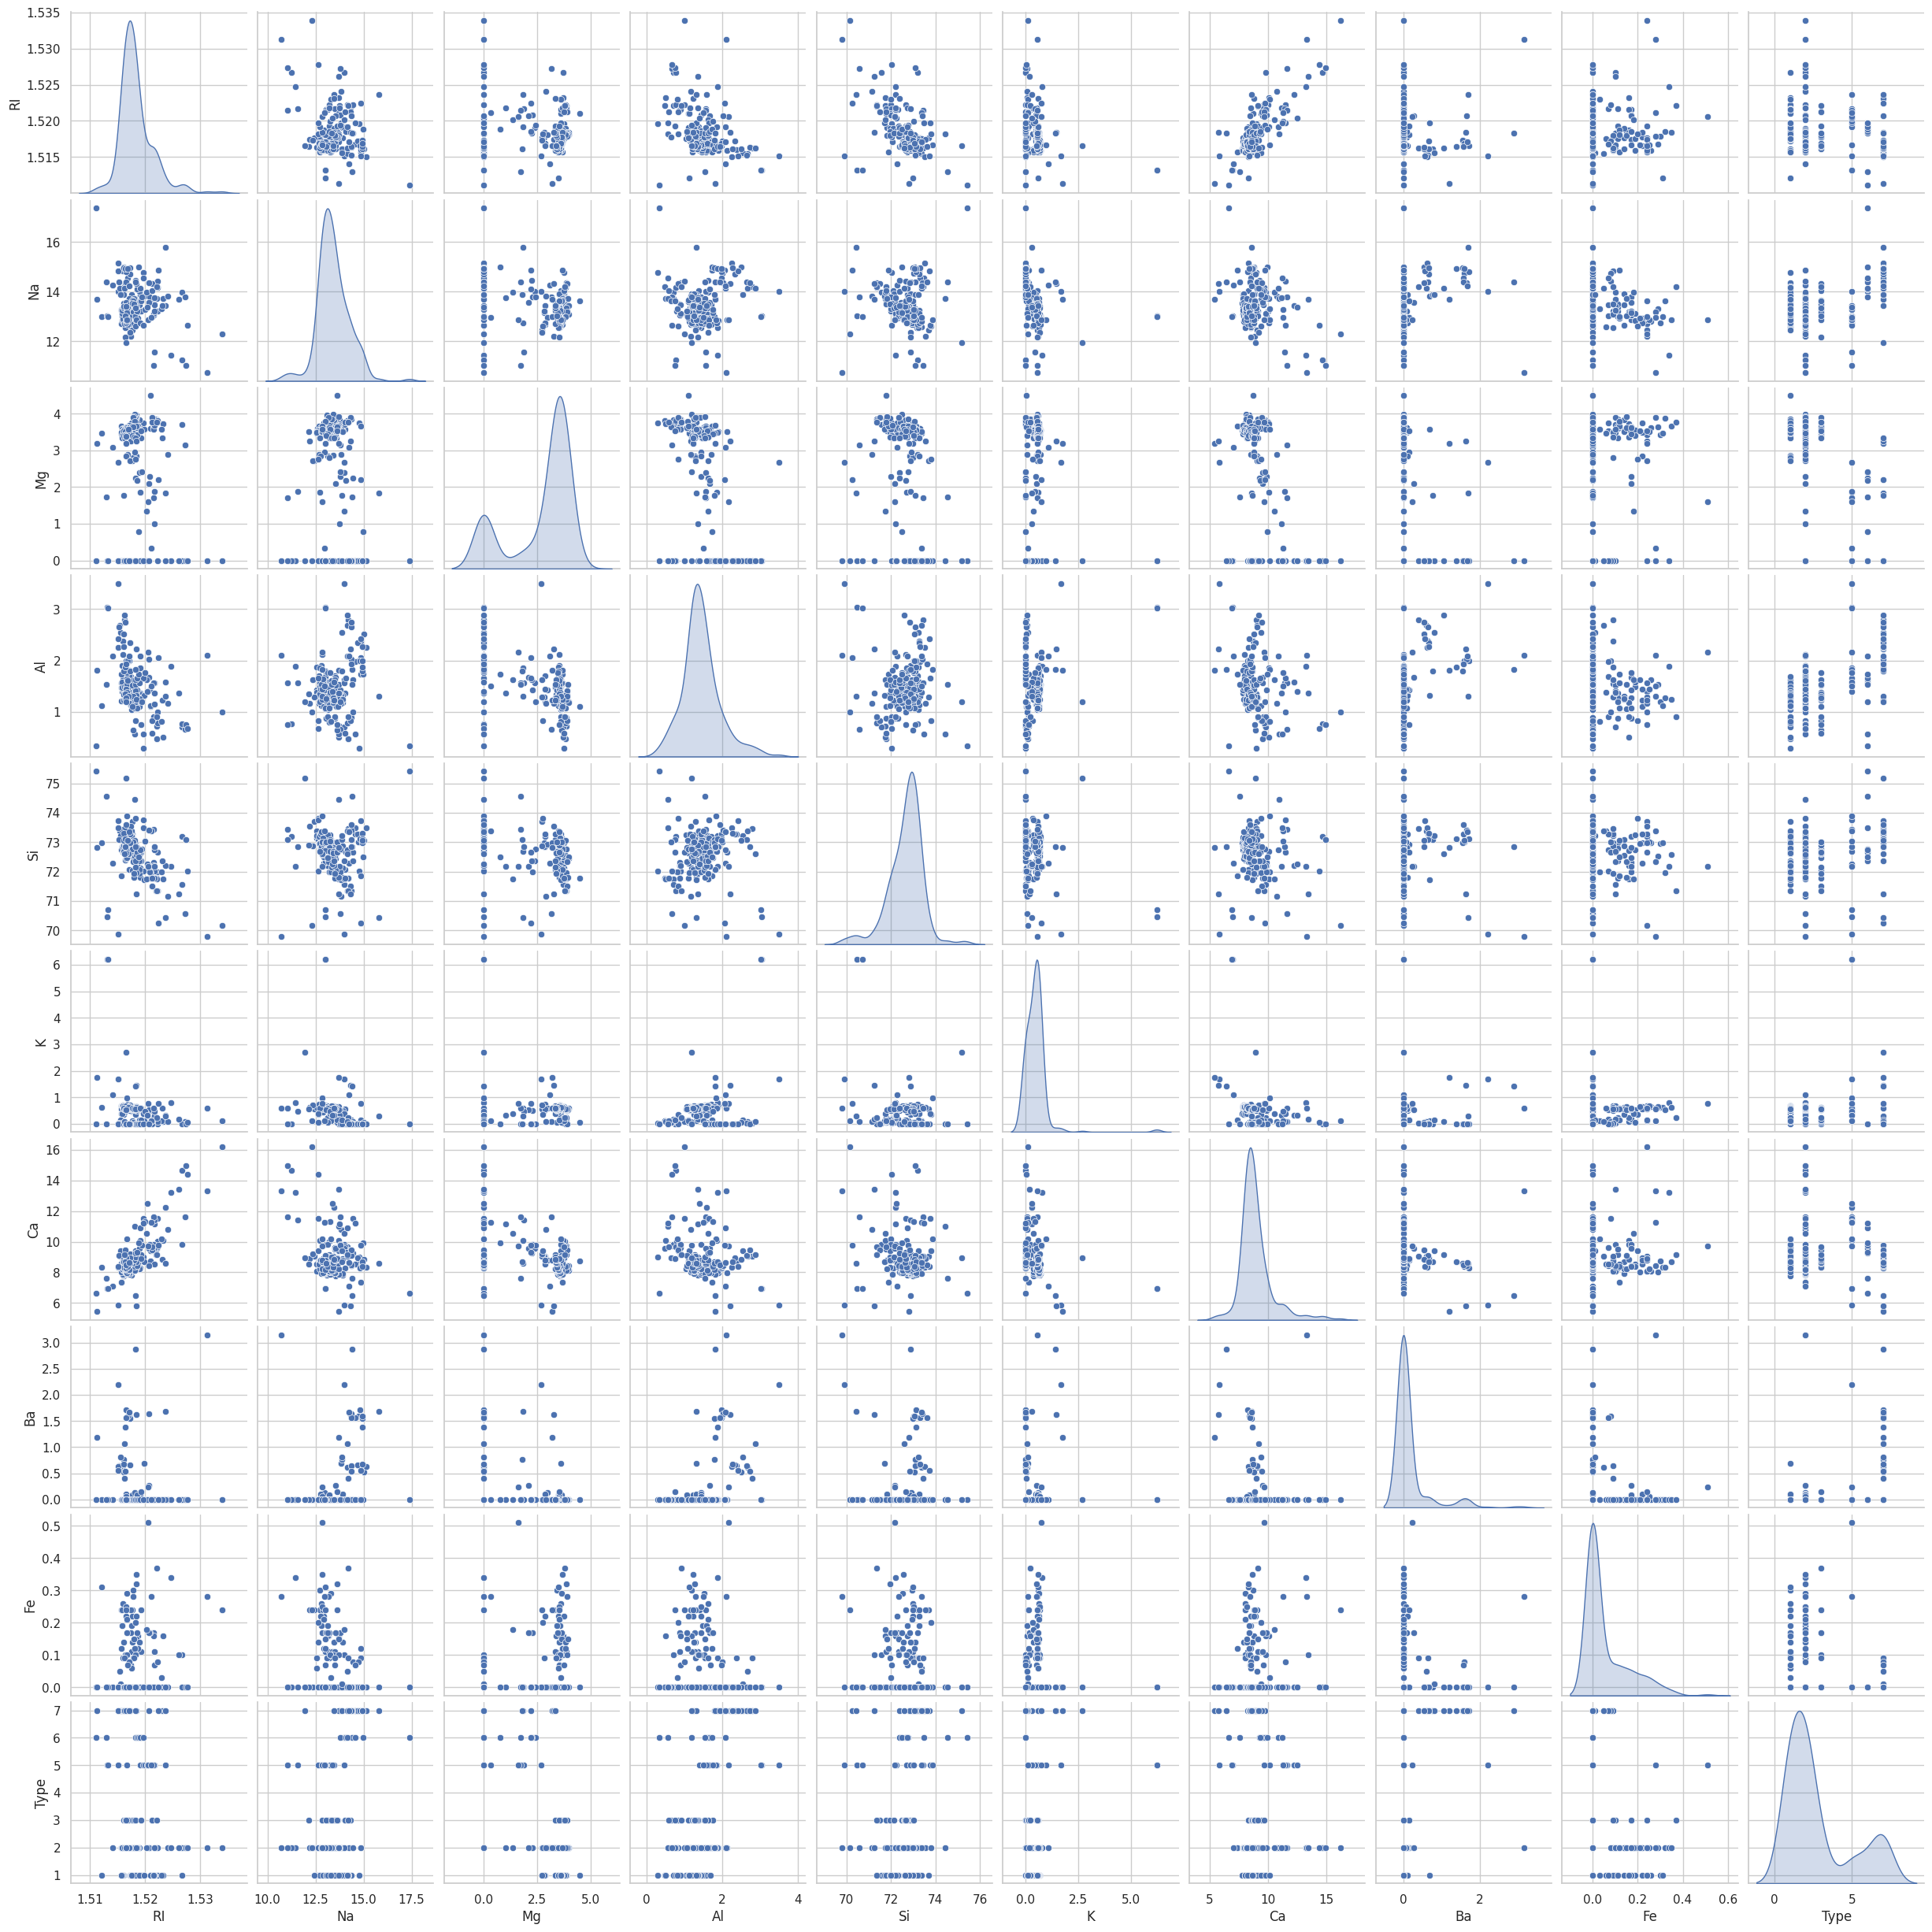

In [ ]:
# Pairplot
sns.set(style="whitegrid")
sns.pairplot(df, diag_kind="kde")
plt.show()

Text(0.5, 1.0, 'Working Class')

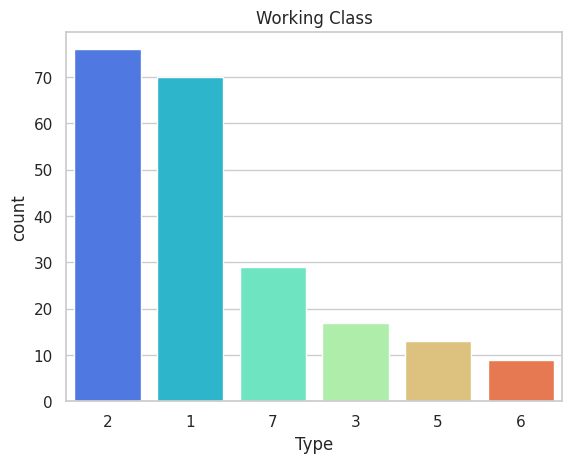

In [ ]:
# Count plot for 'Type' variable
pal = sns.color_palette('rainbow')
sns.countplot(x='Type', data=df, palette = pal,
              order=df['Type'].value_counts().index, );
plt.title('Working Class')

### Data Partition

In [ ]:
X = df.iloc[:,0:-1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
Y = df["Type"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# Model Building

In [ ]:
k1_train = []
k1_test = []
k1_train_error = []
k1_test_error = []


In [ ]:
# Taking k values from 1 to 20
for k in range(1,21):
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []

    for i in range(1, 100):
        KNN = KNeighborsClassifier(n_neighbors=k)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)

        KNN.fit(X_train, Y_train)

        Y_pred_train = KNN.predict(X_train)
        Y_pred_test = KNN.predict(X_test)

        training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
        test_accuracy.append(accuracy_score(Y_test, Y_pred_test))

        training_error.append(1 - accuracy_score(Y_train, Y_pred_train))
        test_error.append(1 - accuracy_score(Y_test, Y_pred_test))

    k1_train.append(np.mean(training_accuracy).round(3))
    k1_test.append(np.mean(test_accuracy).round(3))

    k1_train_error.append(np.mean(training_error).round(3))
    k1_test_error.append(np.mean(test_error).round(3))


In [ ]:
print(k1_train)
print(k1_test)
print(k1_train_error)
print(k1_test_error)

[1.0, 0.834, 0.815, 0.778, 0.749, 0.731, 0.711, 0.698, 0.683, 0.677, 0.666, 0.666, 0.665, 0.663, 0.66, 0.661, 0.655, 0.653, 0.648, 0.645]
[0.712, 0.674, 0.66, 0.651, 0.641, 0.639, 0.629, 0.628, 0.621, 0.626, 0.623, 0.632, 0.629, 0.633, 0.631, 0.632, 0.628, 0.626, 0.623, 0.621]
[0.0, 0.166, 0.185, 0.222, 0.251, 0.269, 0.289, 0.302, 0.317, 0.323, 0.334, 0.334, 0.335, 0.337, 0.34, 0.339, 0.345, 0.347, 0.352, 0.355]
[0.288, 0.326, 0.34, 0.349, 0.359, 0.361, 0.371, 0.372, 0.379, 0.374, 0.377, 0.368, 0.371, 0.367, 0.369, 0.368, 0.372, 0.374, 0.377, 0.379]


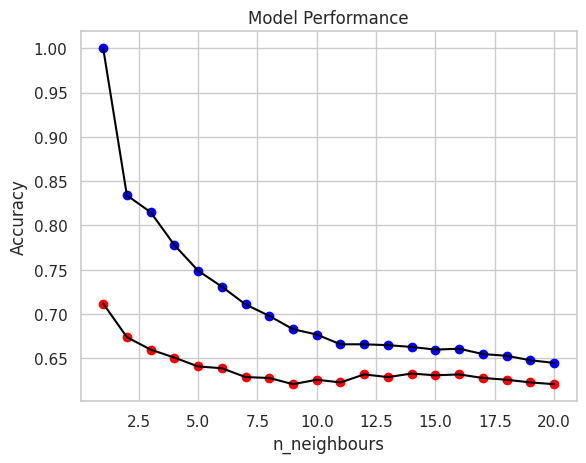

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=range(1,21),y=k1_train,color='blue')
plt.scatter(x=range(1,21),y=k1_test,color='red')
plt.title("Model Performance")
plt.xlabel("n_neighbours")
plt.ylabel("Accuracy")
plt.plot(range(1,21),k1_train,color='black')
plt.plot(range(1,21),k1_test,color='black')
plt.show()

##### From the above plot, we can observe that the **Model Performance** is reducing as the **k value** is increasing

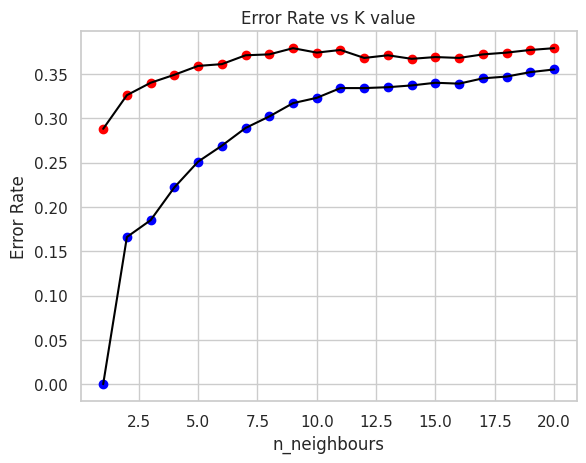

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = range(1,21),y = k1_train_error,color='blue')
plt.scatter(x = range(1,21),y = k1_test_error,color='red')
plt.title("Error Rate vs K value")
plt.xlabel("n_neighbours")
plt.ylabel("Error Rate")
plt.plot(range(1,21),k1_train_error,color='black')
plt.plot(range(1,21),k1_test_error,color='black')
plt.show()

##### From the above plot, we can observe that the **Error Rate** of the model increases as the **k value** increases.

## Grid Search for Algorithm Tuning

In [ ]:
n_neighbors = np.array(range(1,21))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


### Visualizing the CV results

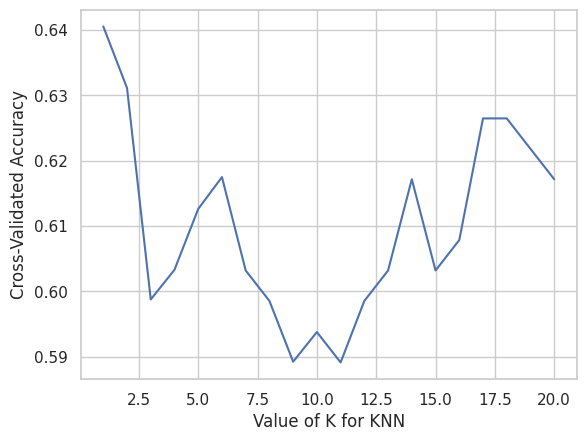

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 21
k_range = range(1, 21)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()